# Diabetes Exploratoray Data Analysis and Prediction

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.All these women are above 21 years of Age. 

In [2]:
#Loading the Libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import plotly.graph_objs as go
import plotly.offline as py


import os


In [3]:
#Loading the dataset
data = pd.read_csv('/home/mahima/Documents/ML/Diabetes/datasets_228_482_diabetes.csv')
data['index'] = pd.Series(data.index)
data = data[[ 'index','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [13]:
data.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


Overall Description of the Dataset


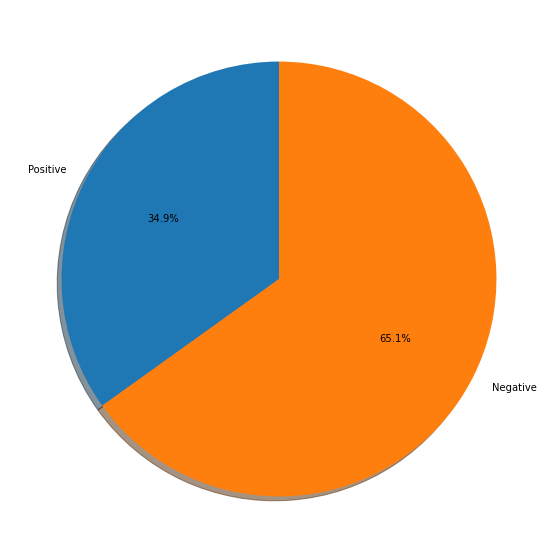

In [47]:
positive = data[data['Outcome']==1]
negative = data[data['Outcome']==0]
pd.options.display.max_columns = None
print("Overall Description of the Dataset")
pos = positive['index'].count()
neg = negative['index'].count()
lis = [pos,neg]
label = ['Positive','Negative']
f,ax = plt.subplots(figsize=(10,10))
plt.pie(lis,labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [14]:
data.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


The dataset consists of several independent variables and one target (dependent) variable- Outcome. Independent variables include the number of pregnancies the patient has had,their Glucose level,Blood pressure and and their Skin thickness, their BMI, insulin level and their age.

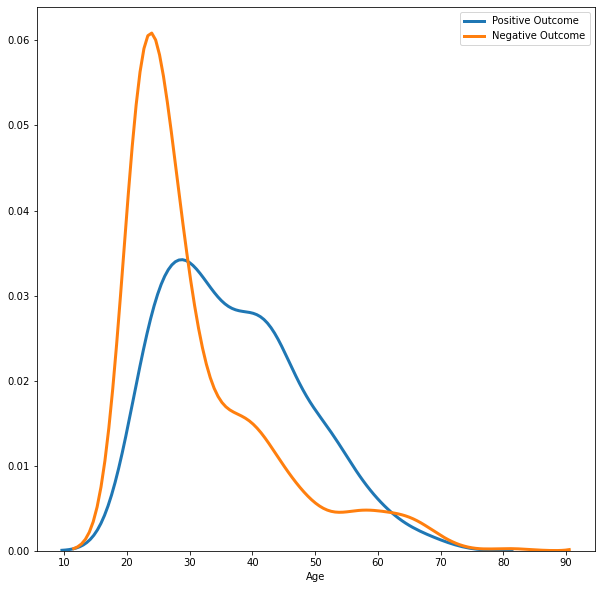

In [6]:
plt.subplots(figsize = (10,10))
sns.distplot(positive['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Positive Outcome')
sns.distplot(negative['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Negative Outcome')
plt.show()

As we can see in most of the cases Diabetes starts to affect predominantly in middle age, around 30.

In [53]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#COUNT
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['red', 'yellow'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
#PERCENTAGE
    trace = go.Pie(labels = ['healthy','diabetic'
def target_percent():], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['red', 'yellow'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [54]:
target_count()
target_percent()

The above graph shows that the data is unbalanced. The dataset contains 34.9% of diabetic patients and 65.1% of non-diabetic patients.

### Grouping Age-wise

We split the 'Age' column into 4 differrent age groups : 'Young Adult', 'Early Adult', 'Adult' and  'Senior'.

In [23]:
data['age']=data['Age']
bins=[21,37,51,65,81]
labels=['Young Adult','Early Adult','Adult','Senior'] #Splitting the 'Age' column into different categories
data['age_grp']=pd.cut(data['age'],bins,labels=labels)

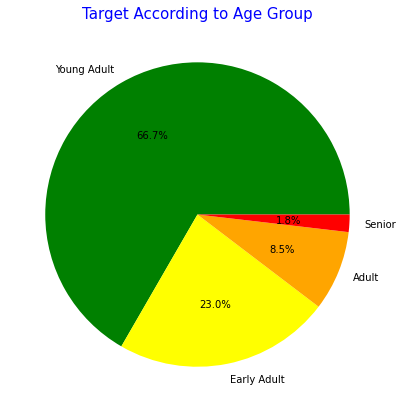

In [24]:
labels = data.age_grp.value_counts().index
colors = ['green','yellow','orange','red']
explode = [0,0,0,0]
sizes = data.age_grp.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Target According to Age Group',color = 'blue',fontsize = 15)
plt.show()

From the above graph we can see that the dataset contains more data on the Young Adults as they include 66.7% of the dataset

In [29]:
grp =data.groupby("age")
x= grp["Glucose"].agg(np.mean)
y=grp["Insulin"].agg(np.mean)
z=grp["BloodPressure"].agg(np.mean)

#### Age vs Glucose

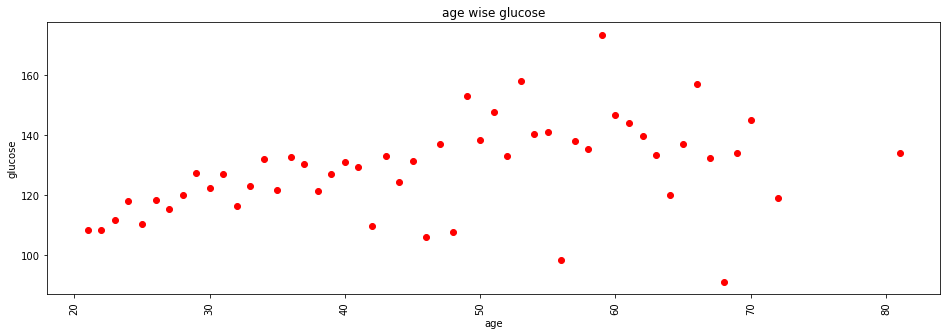

In [30]:

plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='r')
plt.xticks(rotation=90)
plt.title('age wise glucose')
plt.xlabel('age')
plt.ylabel('glucose')
plt.show()

#### Age vs Insulin

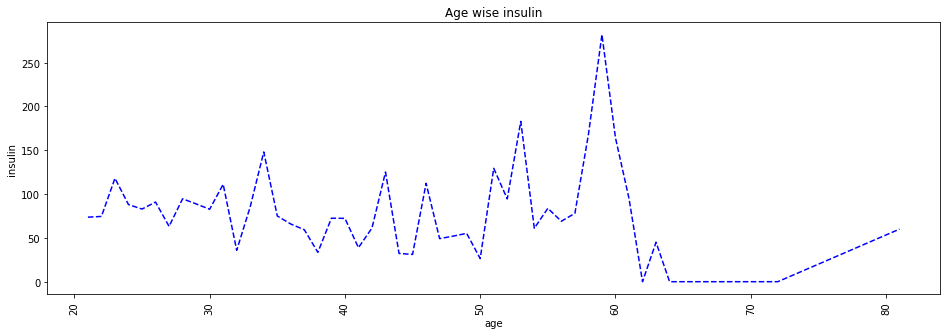

In [31]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='b')
plt.xticks(rotation=90)
plt.title('Age wise insulin')
plt.xlabel('age')
plt.ylabel('insulin')
plt.show()

#### Age vs Blood Pressure

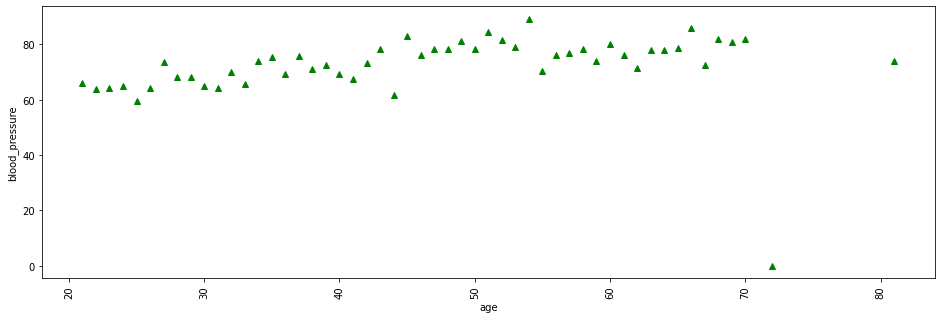

In [32]:
plt.figure(figsize=(16,5))
plt.plot(z,"g^",color='g')
plt.xticks(rotation=90)
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.show()

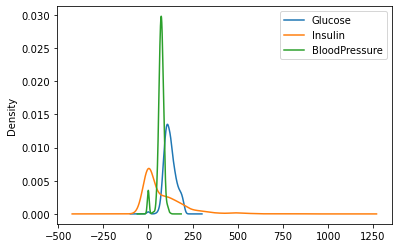

In [35]:
data.glucose = data['Glucose']
data.insulin = data['Insulin']
data.blood_pressure = data['BloodPressure']
ax=data.glucose.plot.kde()
ax=data.insulin.plot.kde()
ax=data.blood_pressure.plot.kde()
plt.legend()
plt.show()

From the above graph we see that the person's Blood Pressure is most affected if they are diabetic.

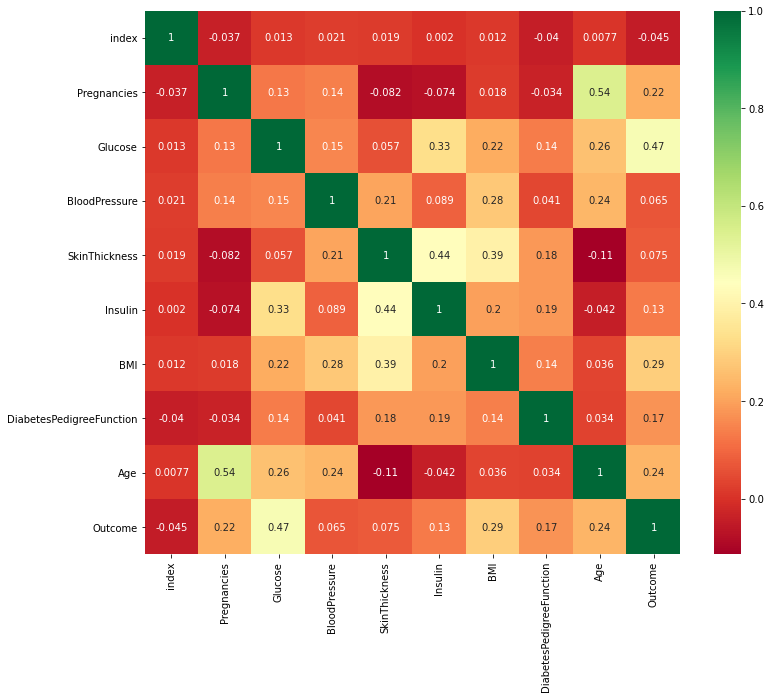

In [22]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Building a Heatmap to see correlation between each and every Columns

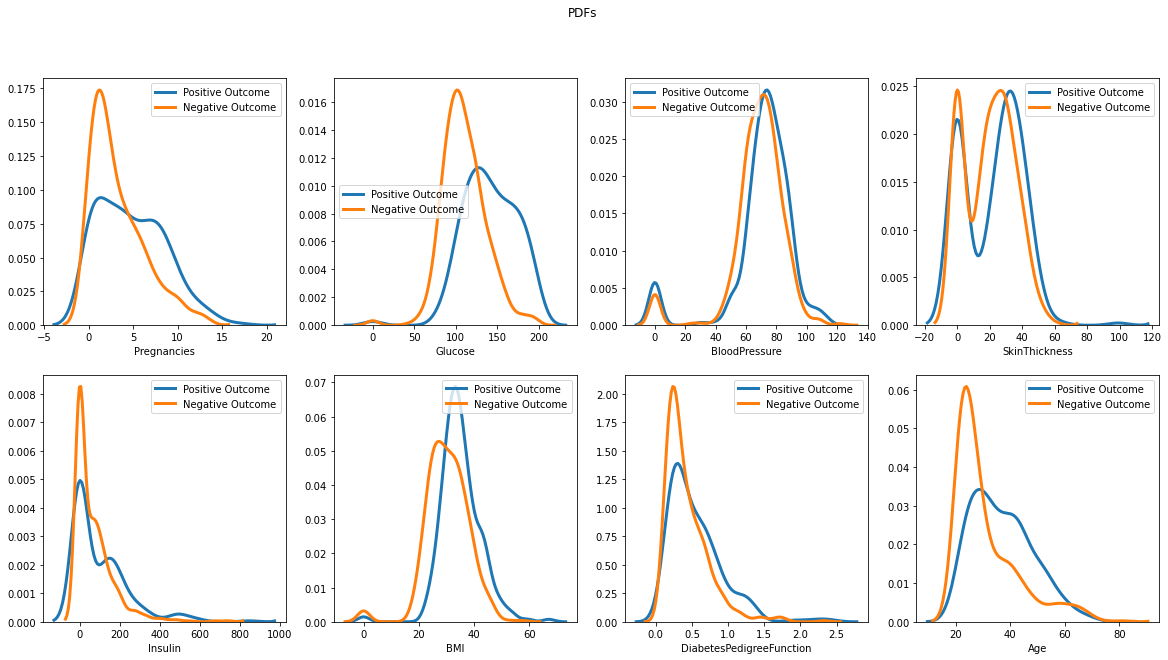

In [8]:
f, axes = plt.subplots(2, 4,figsize=(20,10))
count=0

for i in range(2):
    for j in range(4):
        count=count+1
        sns.distplot(positive.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Positive Outcome',ax = axes[i][j])
        sns.distplot(negative.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Negative Outcome',ax = axes[i][j])
        axes[i][j].legend()
        
f.suptitle('PDFs')
plt.show()
      

Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. We have visualized the relationship of the outcomes with each column.

## Prediction using KNN 

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

We assign it a value K which is used to find and compare the neighbors.Since we don't know the best K-Value we run a loop to figure out which value of K gives the best Output.

In [48]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(d,y_train,test_size=0.3,stratify=y_train,random_state=0)
from sklearn.neighbors import KNeighborsClassifier 
acc_vals=[]
kvalue=None
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain,yTrain)
    output = knn.predict(xTest)
    from sklearn.metrics import accuracy_score
    acc_vals.append(accuracy_score(output,yTest))
    if max(acc_vals)==accuracy_score(output,yTest):
        kvalue=i
        
print("K-Value:{0} and Accuracy Score:{1}%".format(kvalue,max(acc_vals)*100))

K-Value:8 and Accuracy Score:77.05627705627705%


After running a loop we find that the best K-Value is 8 anf the Accuracy using KNN is 77%

## Prediction using Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables.

In [12]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(xTrain,yTrain)
ouput = lr.predict(xTest)
print(accuracy_score(output,yTest)*100,'%')

75.32467532467533 %


The accuracy using Logistic Regression is 75%

## Performance Analysis using Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

We use the KNN-Classifier to perform the analysis as it has a better accuracy value than the Logistic Regession model.

In [49]:
from sklearn.metrics import confusion_matrix
yPred = knn.predict(xTest)
confusion_matrix(yTest,yPred) 
pd.crosstab(yTest, yPred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,124,26,150
1,31,50,81
All,155,76,231


Text(0.5, 15.0, 'Predicted label')

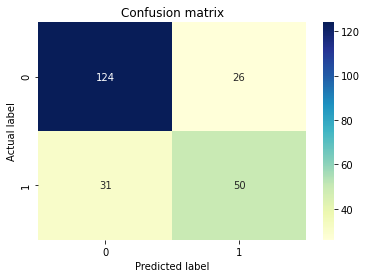

In [50]:
y_pred = knn.predict(xTest)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(yTest, yPred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

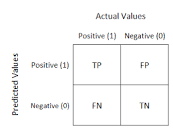

Precision Score : Accuracy of positive predictions
    TP – True Positives
    FP – False Positives

    Precision = TP/(TP + FP)
Recall Score : Fraction of positives that were correctly identified
    FN – False Negatives

    Recall = TP/(TP+FN)
    
F1 Score : the harmonic mean of precision and recall

    F1 = 2 x (precision x recall)/(precision + recall)

    
    

In [52]:
#From the classifiction report
from sklearn.metrics import classification_report
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       150
           1       0.66      0.62      0.64        81

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231

